In [2]:
# taamolat data set
taamolat_directory  = 'Authors Dataset/taamolat/'
TAAMOLAT_NUMBER_OF_AUTHORS = 7
TAAMOLAT_NUMBER_OF_SAMPLES_PER_AUTHOR = 10

# alaraby data set
alaraby_directory = 'Authors Dataset/alaraby/'
ALARABY_NUMBER_OF_AUTHORS = 9
ALARABY_NUMBER_OF_SAMPLES_PER_AUTHOR = 10

In [3]:
def get_authors_names(directory_name, number_of_authors):
    import configparser

    # Create a ConfigParser object
    config = configparser.ConfigParser()

    # save the authors names in a list
    authors = []
    for i in range(number_of_authors):
        # Read the properties file with the correct encoding (e.g., 'utf-8')
        with open(f'{directory_name}a{i}/a{i}_0.properties', encoding='utf-8') as f:
            # Add a default section header to the file
            content = '[default]\n' + f.read()
            config.read_string(content)

        # Get the author name
        # Get the value of the 'author_name' key
        author_name = config.get('default', 'author_name')
        authors.append(author_name)

    return authors

In [19]:
taamolat_authors_english = get_authors_names(taamolat_directory, TAAMOLAT_NUMBER_OF_AUTHORS)
# manually add the arabic names of the authors of the taamolat dataset
taamolat_authors_names = ['محمد عواد', 'محمد زينوبة', 'يونس جعدي', 'نور الدين رافع', 'عبير قلوطي', 'معتز خطيب', 'إبراهيم نصر الله']
taamolat_authors = [ i for i in range(TAAMOLAT_NUMBER_OF_AUTHORS) ]
alaraby_authors_names = get_authors_names(alaraby_directory, ALARABY_NUMBER_OF_AUTHORS)
alaraby_authors = [ i for i in range(ALARABY_NUMBER_OF_AUTHORS) ]

#
#print(taamolat_authors_names)
print(alaraby_authors_names)

['عبد الله الشريف', 'عادل الأحمدي', 'عبسي سميسم', 'إياد حميد', 'ناصر السهلي', 'نضال محمد وتد', 'عثمان لحياني', 'صالح النعامي', 'وليد التليلي']


['taamolat_a0', 'taamolat_a1', 'taamolat_a2', 'taamolat_a3', 'taamolat_a4', 'taamolat_a5', 'taamolat_a6', 'alaraby_a0', 'alaraby_a1', 'alaraby_a2', 'alaraby_a3', 'alaraby_a4', 'alaraby_a5', 'alaraby_a6', 'alaraby_a7', 'alaraby_a8']


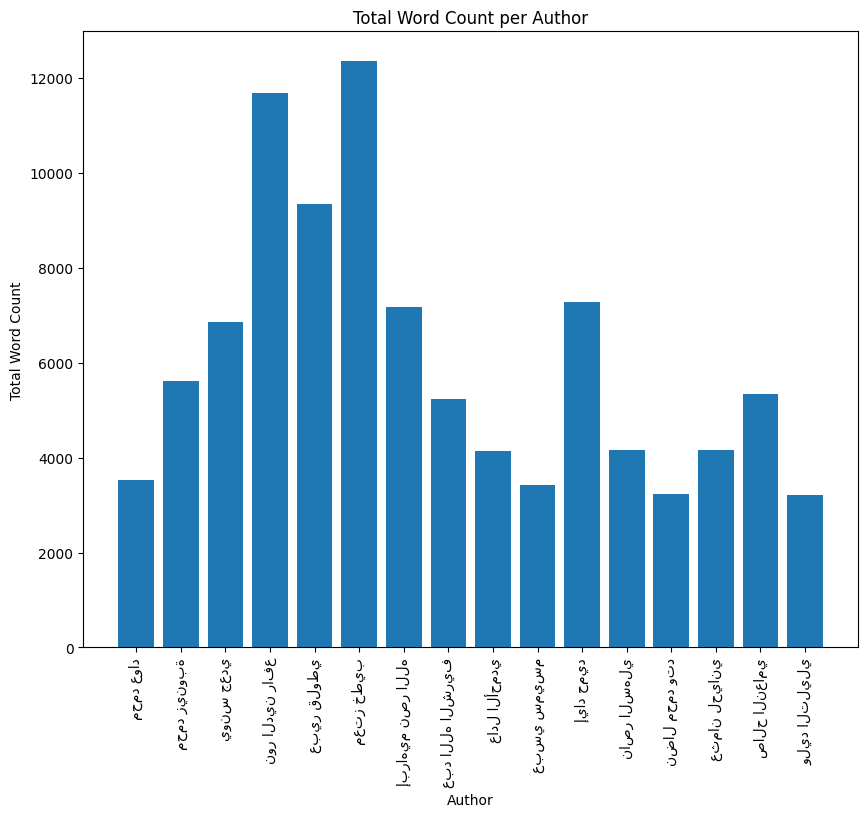

In [21]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Specify the directories
directories = ['Authors Dataset/taamolat', 'Authors Dataset/alaraby']

def count_words_in_file(filename):
    with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
        words = f.read().split()
    return len(words)

def get_author_word_count(directory):
    author_word_count = defaultdict(int)
    for root, dirs, files in os.walk(directory):
        # Prefix the author name with the source
        source = os.path.basename(directory)
        author = source + '_' + os.path.basename(root)
        for file in files:
            if file.startswith('sample'):
                author_word_count[author] += count_words_in_file(os.path.join(root, file))
    return author_word_count

total_word_count = defaultdict(int)
for directory in directories:
    author_word_count = get_author_word_count(directory)
    for author, word_count in author_word_count.items():
        total_word_count[author] += word_count

# Plotting
authors = list(total_word_count.keys())
print(authors)
authors =  authors =  authors =  ['محمد عواد', 'محمد زينوبة', 'يونس جعدي', 'نور الدين رافع', 'عبير قلوطي', 'معتز خطيب', 'إبراهيم نصر الله','عبد الله الشريف', 'عادل الأحمدي', 'عبسي سميسم', 'إياد حميد', 'ناصر السهلي', 'نضال محمد وتد', 'عثمان لحياني', 'صالح النعامي', 'وليد التليلي']
word_counts = list(total_word_count.values())

plt.figure(figsize=(10, 8))
plt.bar(authors, word_counts)
plt.xlabel('Author')
plt.ylabel('Total Word Count')
plt.title('Total Word Count per Author')
plt.xticks(rotation=90)
plt.show()
